In [1]:
from SNRanalysis import *

The below code is from the python file SNRanalysis.py, contained within the function example(). The purpose is to plot the SNR of CCFs against frequency and also the max amplitude ratio between positive and negative lag times. There are also options to plot spectral width using functions from covseisnetfunc.py. Can also plot spectrogram data (requires pre-prepared csv file).

First part is chosing parameters associated with computation of CCF SNR. Of particular interest are parameters minlagwin and maxlagwin, which will determine the window to calculate the average SNR. Also, boolean plotAmpSym triggers whether you are plotting the SNR ratio between positive and negative lag times, or the amplitude. Both are plotted to log base 2. Note, while SNR is based on the max SNR within the defined window, max amplitude is currently based on any lag time either side, excluding the first 5 seconds.

In [2]:
#params for which data to use
startdate = '2006-01-01'
enddate = '2006-04-01'

#params for SNR computation
noisedir = '/home/yatesal/msnoise/ruapehu1' #set to directory containing 'STACK' folder of interest
network = 'NZ'
loc = '10'
stat1 = 'NGZ'
stat2 = 'PKVZ' #for single-station, set to same as stat1
component = 'ZZ'
stacksize = 10 #not required to match msnoise stacksize
fs = 25 #set to match CCFs
maxlag = 120 #set to match CCFs

minlagwin = 10 #minimum lag for SNR window
maxlagwin = 40 #maximum lag for SNR window
plotAmpSym = True #False = asymmetry in CCF SNR, True = asymmetry in CCF amplitude

#put into array for passing to SNR computation function
CCFparams = [noisedir, network, loc, stat1, stat2, component, stacksize, fs, maxlag]


Note for this to work, the filters applied to CCFs need to match those in the text file 'sql_filters.odt'. The easiest way to setup the filters is to go into the database directly in mysql, i.e. 'use *databasename*' and copy and paste the contents of the file. This will create 26 filters, with varied frequencies. The last four of these (23-26), are not plotted, but can be helpful for checking output (they are 0.1-0.5Hz, 0.5-1.0Hz, 1.0-2.0Hz, 2.0-4.0Hz respectively). Currently, the filter low and high values are hardcoded into code, so you cannot create your own filters and have this code still work properly.

Next part of code is adding the directory containing covseisnet output you want to plot (currently assuming it is located within the 'outputs' folder in the same directory. You have the choice to turn plotting on or off with the boolean 'plotcsn'.

Similarly, if you want to plot a spectrogram too (using boolean also), you need to set the directory and filename of the csv containing the output you wish to plot (can add my codes for this if helpful).

In [3]:
#param for covseisnet   
csndirectory = 'RUA001' #set to directory containing covseisnet output
plotcsn = True

#param for spectrogram
plotspectrogram = True
specdir='/home/yatesal/Scripts/Corentin_RSAM/output/'
specfname='DRZ_EHZ_2006_1_1_2007_1_1.csv' #csv file name
vmax = 50000 #for plotting


Remainder of script requires no adjustment, and will finish plotting based on the inputs above.

Plotting SNR data...


/home/yatesal/covseisnet_ASY/SNRanalysis.py:169: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img1 = ax[axstart].pcolormesh(ccfdates, centfreqs, snr_freq_array[:,:-1], vmin=2, rasterized=True, cmap="jet", shading='auto')
/home/yatesal/covseisnet_ASY/SNRanalysis.py:178: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img2 = ax[axstart+1].pcolormesh(ccfdates, centfreqs, asym_freq_array[:,:-1], rasterized=True, cmap="seismic", shading='auto', vmin=maxasym*-1, vm

Plotting spectrogram...


/home/yatesal/covseisnet_ASY/SNRanalysis.py:67: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh=ax.pcolormesh(df.index,df.columns,df.T,vmin=-120,vmax=vmax,cmap='Spectral_r')


Plotting spectral width...


/home/yatesal/covseisnet_ASY/covseisnetfunc.py:185: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(times, frequencies, spectral_width, rasterized=True, cmap="viridis_r", shading='auto')


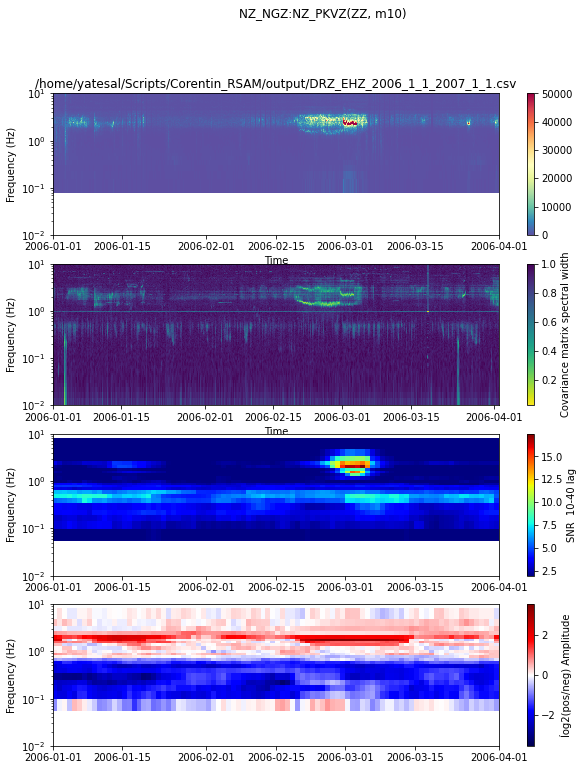

In [4]:
if plotspectrogram and plotcsn:
    numsubplots = 4
    csnax = 1
elif not plotspectrogram and not plotcsn:
    numsubplots = 2
else:
    numsubplots = 3
    csnax = 0

fig, ax = plt.subplots(numsubplots,1, figsize=(10,12))

title = network+'_'+stat1+':'+network+'_'+stat2+'('+component+', m'+str(stacksize)+')'
fig.suptitle(title)

print('Plotting SNR data...')
plotSNR(CCFparams, startdate, enddate, minlagwin, maxlagwin, plotAmpSym, fig, ax, axstart=int(numsubplots-2))

if plotspectrogram == True:
    print('Plotting spectrogram...')
    plot_spectogram(specdir+specfname, startdate, enddate, classic=True, demean=False,norm=False, Cor_norm=False, vmax=vmax, fig=fig, ax=ax[0])

if plotcsn == True:
    print('Plotting spectral width...')
    plotSpectralWidth(csndirectory, startdate, enddate, samprate = 25, log=True, count=False, norm=True, fig=fig, ax=ax[csnax])

for i in range(numsubplots):
   ax[i].set_ylim(0.01,10)

plt.show()
